In [1]:
from IPython.display import Audio
import matplotlib.pyplot as plt
import tensorflow as tf

from custom_metrics import f1_m, precision_m, recall_m
from utils import get_commands
from data import preprocess_dataset

AUTOTUNE = tf.data.AUTOTUNE
commands = get_commands("../data/mini_speech_commands")

<h2>Load model</h2>

Load trained model from disk

In [2]:
trained_model = tf.keras.models.load_model('../model',
                                           custom_objects={
                                               "f1_m": f1_m,
                                               "precision_m": precision_m,
                                               "recall_m": recall_m
                                           })
trained_model.summary()

2022-05-13 19:38:43.197022: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-13 19:38:43.246014: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-13 19:38:43.246152: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-13 19:38:43.246604: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 32, 32, 1)         0         
                                                                 
 normalization (Normalizatio  (None, 32, 32, 1)        3         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0


<h2>Load in self spoken sample and use model make prediction</h2>

2022-05-13 19:38:44.659334: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8400
/tmp/ipykernel_1180037/4015509808.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  plt.title(f"Predictions {commands[label]}")


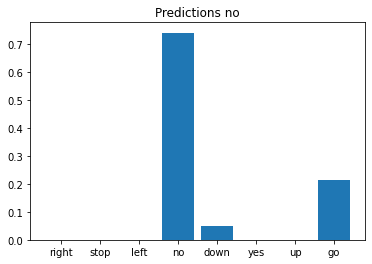

In [3]:
sample_file = '../custom_data/commands/no/no_Joey.wav'

sample_ds = preprocess_dataset([str(sample_file)], commands)

for spectrogram, label in sample_ds.batch(1):
    prediction = trained_model(spectrogram)
    plt.bar(commands, tf.nn.softmax(prediction[0]))
    plt.title(f"Predictions {commands[label]}")
    plt.show()

Audio(sample_file, rate=16000)